**Welcome to my Notebook**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/indian-startup-boom/Indian Startup.csv


# **Import Helpful Libraies**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# **Import Data Set**

In [3]:
df = pd.read_csv("/kaggle/input/indian-startup-boom/Indian Startup.csv")
df.head()

,Company/Brand,Founded,Headquarters,Sector,What it does,Founder/s,Investor/s,Amount,Stage,Date
0,CollegeDekho,2015.0,Gurgaon,E-learning,"Collegedekho.com is Student’s Partner, Friend ...",Ruchir Arora,"Disrupt ADQ, QIC","$35,000,000",Series B,Dec-2021
1,BOX8,2012.0,Mumbai,Food & Beverages,India's Largest Desi Meals Brand,"Anshul Gupta, Amit Raj",Tiger Global,"$40,000,000",NaN,Dec-2021
2,Simpl,2015.0,Bangalore,Consumer Services,Simpl empowers merchants to build trusted rela...,"Nitya, Chaitra Chidanand","Valar Ventures, IA Ventures","$40,000,000",Series B,Dec-2021
3,8i Ventures,2018.0,Mumbai,Venture Capital & Private Equity,8i is a Mumbai & Bangalore based early stage f...,Vikram Chachra,NaN,"$50,000,000",NaN,Dec-2021
4,PayGlocal,2021.0,Bangalore,Financial Services,PayGlocal is a FinTech solving for global paym...,"Prachi Dharani, Rohit Sukhija, Yogesh Lokhande",Sequoia Capital India,"$4,900,000",Series A,Dec-2021


# **Explore DataSet**

In [4]:
df.shape

(1209, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   Headquarters   1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What it does   1209 non-null   object 
 5   Founder/s      1205 non-null   object 
 6   Investor/s     1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
 9   Date           1209 non-null   object 
dtypes: float64(1), object(9)
memory usage: 94.6+ KB


In [6]:
df.isnull().sum()

Company/Brand      0
Founded            1
Headquarters       1
Sector             0
What it does       0
Founder/s          4
Investor/s        62
Amount             3
Stage            428
Date               0
dtype: int64

In [7]:
for col in df.columns:
    print("{} have {} values: {}".format(col, df[col].nunique(), df[col][0]))

Company/Brand have 1033 values: CollegeDekho
Founded have 30 values: 2015.0
Headquarters have 70 values: Gurgaon
Sector have 256 values: E-learning
What it does have 1143 values: Collegedekho.com is Student’s Partner, Friend & Confidante, To Help Him Take a Decision and Move On to His Career Goals
Founder/s have 1096 values: Ruchir Arora
Investor/s have 938 values: Disrupt ADQ, QIC
Amount have 208 values: $35,000,000
Stage have 33 values: Series B
Date  have 12 values: Dec-2021


In [8]:
df.describe()

,Founded
count,1208.000000
mean,2016.655629
std,4.517364
min,1963.000000
25%,2015.000000
50%,2018.000000
75%,2020.000000
max,2021.000000


1. Data contain 1209 rows and 10 columns
2. 1 float column and 9 object
3. 6 columns have null values in which stage have maximum null values

# **Clean Data**
**In Data some column have null values, so we have to handle null values**

<AxesSubplot:>

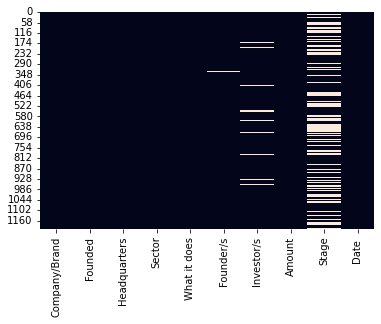

In [9]:
sns.heatmap(df.isnull(), cbar=False) #finding columns having nan values

In [10]:
df.isnull().sum()

Company/Brand      0
Founded            1
Headquarters       1
Sector             0
What it does       0
Founder/s          4
Investor/s        62
Amount             3
Stage            428
Date               0
dtype: int64

In [11]:
df.loc[df['Company/Brand'] == 'Smart Express']

,Company/Brand,Founded,Headquarters,Sector,What it does,Founder/s,Investor/s,Amount,Stage,Date
494,Smart Express,NaN,Mumbai,Logistics,India’s Most Innovative and Awarded Express Lo...,Yogesh Dhingra,"IIFL India Private Equity Fund, Smiti Holding ...","$10,000,000",Seed,Aug-2021


In [12]:
# Smart Express founded column is empty, Google about smart express and found the year and filling the null value
df.iloc[494, 1] = 2018
df.loc[df['Company/Brand'] == 'Smart Express']

,Company/Brand,Founded,Headquarters,Sector,What it does,Founder/s,Investor/s,Amount,Stage,Date
494,Smart Express,2018.0,Mumbai,Logistics,India’s Most Innovative and Awarded Express Lo...,Yogesh Dhingra,"IIFL India Private Equity Fund, Smiti Holding ...","$10,000,000",Seed,Aug-2021


In [13]:
df.loc[df['Company/Brand'] == 'Vidyakul']

,Company/Brand,Founded,Headquarters,Sector,What it does,Founder/s,Investor/s,Amount,Stage,Date
419,Vidyakul,2017.0,Gurugram,EdTech,Vidyakul is a group of academic experts.,"Tarun Saini, Gaurav Singhvi",We Founder Circle,"$500,000",Bridge,Sep-2021
915,Vidyakul,2018.0,NaN,EdTech,Vidyakul is an vernacular e-learning platform ...,"Raman Garg, Tarun Saini","JITO Angel Network, SOSV","$500,000",Seed,Apr-2021


In [14]:
# in one Vidyakul Headquarters columns have null value, So Google about it and fill the null columnns
df.iloc[915, 2] = 'Gurugram'
df.loc[df['Company/Brand'] == 'Vidyakul']

,Company/Brand,Founded,Headquarters,Sector,What it does,Founder/s,Investor/s,Amount,Stage,Date
419,Vidyakul,2017.0,Gurugram,EdTech,Vidyakul is a group of academic experts.,"Tarun Saini, Gaurav Singhvi",We Founder Circle,"$500,000",Bridge,Sep-2021
915,Vidyakul,2018.0,Gurugram,EdTech,Vidyakul is an vernacular e-learning platform ...,"Raman Garg, Tarun Saini","JITO Angel Network, SOSV","$500,000",Seed,Apr-2021


In [15]:
df.loc[df['Company/Brand'] == 'Sochcast']

,Company/Brand,Founded,Headquarters,Sector,What it does,Founder/s,Investor/s,Amount,Stage,Date
335,Sochcast,2020.0,Online Media #REF!,Sochcast is an Audio experiences company that ...,"CA Harvinderjit Singh Bhatia, Garima Surana, A...","Vinners, Raj Nayak, Amritaanshu Agrawal",$Undisclosed,NaN,NaN,Sep-2021


In [16]:
# Sochcast data is not inserted properly in there columns, so i give proper value to proper columns
df.iloc[335, 2] = 'Bangalore'
df.iloc[335, 3] = 'Online Media'
df.iloc[335, 4] = 'Sochcast is an Audio experiences company that give the listener and creators an Immersive Audio experience'
df.iloc[335, 5] = 'CA Harvinderjit Singh Bhatia, Garima Surana, Anil Srivatsa'
df.iloc[335, 6] = 'Vinners, Raj Nayak, Amritaanshu Agrawal'
df.iloc[335, 7] = 'Undisclosed'
df.loc[df['Company/Brand'] == 'Sochcast']

,Company/Brand,Founded,Headquarters,Sector,What it does,Founder/s,Investor/s,Amount,Stage,Date
335,Sochcast,2020.0,Bangalore,Online Media,Sochcast is an Audio experiences company that ...,"CA Harvinderjit Singh Bhatia, Garima Surana, A...","Vinners, Raj Nayak, Amritaanshu Agrawal",Undisclosed,NaN,Sep-2021


In [17]:
df.loc[df['Company/Brand'] == 'MYRE Capital']

,Company/Brand,Founded,Headquarters,Sector,What it does,Founder/s,Investor/s,Amount,Stage,Date
784,MYRE Capital,2020.0,Mumbai,Commercial Real Estate,Democratising Real Estate Ownership,Own rent yielding commercial properties,Aryaman Vir,NaN,"$6,000,000",Jun-2021


In [18]:
# Give proper data to this columns too
df.iloc[784, 5] = 'Aryaman Vir'
df.iloc[784, 4] = 'Own rent yielding commercial properties'
df.loc[df['Company/Brand'] == 'MYRE Capital']

,Company/Brand,Founded,Headquarters,Sector,What it does,Founder/s,Investor/s,Amount,Stage,Date
784,MYRE Capital,2020.0,Mumbai,Commercial Real Estate,Own rent yielding commercial properties,Aryaman Vir,Aryaman Vir,NaN,"$6,000,000",Jun-2021


In [19]:
df.loc[df['Company/Brand'] == 'Onsurity']

,Company/Brand,Founded,Headquarters,Sector,What it does,Founder/s,Investor/s,Amount,Stage,Date
546,Onsurity,2020.0,Bangalore,Healthcare,Onsurity is a HealthTech & Employee Benefits o...,"Yogesh Agarwal, Kulin Shah",Nexus Venture Partners,"$16,000,000",Series A,Aug-2021
972,Onsurity,2020.0,Bangalore,HealthCare,Onsurity is an employee healthcare platform pr...,"Kulin Shah, Yogesh Agarwal","Jitendra Gupta, Harsh Shah",NaN,NaN,Apr-2021


In [20]:
# Company onsurity have 2 entries so i deleted one entry
df = df.drop([df.index[972]])
df.loc[df['Company/Brand'] == 'Onsurity']

,Company/Brand,Founded,Headquarters,Sector,What it does,Founder/s,Investor/s,Amount,Stage,Date
546,Onsurity,2020.0,Bangalore,Healthcare,Onsurity is a HealthTech & Employee Benefits o...,"Yogesh Agarwal, Kulin Shah",Nexus Venture Partners,"$16,000,000",Series A,Aug-2021


In [21]:
df.loc[df['Amount'].isnull() == True]

,Company/Brand,Founded,Headquarters,Sector,What it does,Founder/s,Investor/s,Amount,Stage,Date
784,MYRE Capital,2020.0,Mumbai,Commercial Real Estate,Own rent yielding commercial properties,Aryaman Vir,Aryaman Vir,NaN,"$6,000,000",Jun-2021


In [22]:
# MYRE Capital amount is entered in columns, so switch if with right one
df.iloc[784, 7] = '$6,000,000'
df.iloc[784, 8] = 'NaN'
df.loc[df['Company/Brand'] == 'MYRE Capital']

,Company/Brand,Founded,Headquarters,Sector,What it does,Founder/s,Investor/s,Amount,Stage,Date
784,MYRE Capital,2020.0,Mumbai,Commercial Real Estate,Own rent yielding commercial properties,Aryaman Vir,Aryaman Vir,"$6,000,000",NaN,Jun-2021


In [23]:
df.loc[df['Founder/s'].isnull() == True]

,Company/Brand,Founded,Headquarters,Sector,What it does,Founder/s,Investor/s,Amount,Stage,Date
62,ByteLearn,2021.0,Noida,E-learning,AI powered teaching assistant for 100 Mn teach...,NaN,"Aditya Singhal, Nishant Sinha","$9,500,000",Seed,Dec-2021
330,PredictiVu,2020.0,Gurugram,Management Consulting,PredictiVu's AI-enabled dashboard integrated w...,NaN,Kunal Sarkar,"$1,500,000",Pre-seed,Sep-2021
422,NeuroPixel.AI,2020.0,Bangalore,Deeptech,NeuroPixel.AI Labs is a deep tech start-up tha...,NaN,"Arvind Venugopal Nair, Amritendu Mukherjee","$800,000",Seed,Sep-2021
668,The Sleep Company,2019.0,Mumbai,Consumer Goods,Patent Pending sleep technology developed by a...,NaN,Fireside Ventures,"$1,000,000",Pre-series A,Jul-2021


**4 Company founders is not mention in dataset, So Google about the company and fill the null values**

In [24]:
df.iloc[62, 5] = 'Nishant Sinha'
df.iloc[330, 5] = 'Manish Narang and Raja Vishal Oberoi'
df.iloc[422, 5] = 'Arvind Nair and Amritendu Mukherjee'
df.iloc[668, 5] = 'Priyanka Salot'
df.loc[df['Founder/s'].isnull() == True]

,Company/Brand,Founded,Headquarters,Sector,What it does,Founder/s,Investor/s,Amount,Stage,Date


In [25]:
df.isnull().sum()

Company/Brand      0
Founded            0
Headquarters       0
Sector             0
What it does       0
Founder/s          0
Investor/s        62
Amount             0
Stage            427
Date               0
dtype: int64

***All the information which i added to this dataset to fill the null values are taken from "Google". I searched about the company and take proper information from it.***

**Clean Most of the dataset, Now its time for EDA**

# **EDA [Exploratory Data Analysis]**

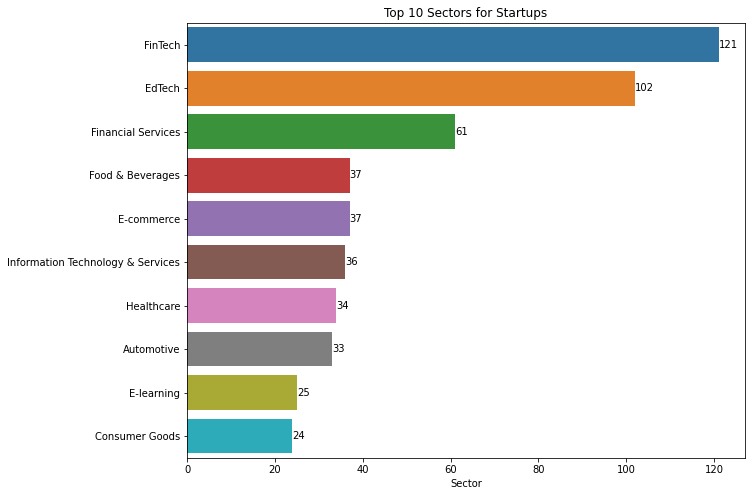

In [26]:
#Top 10 Sectors for Startups
sector = df['Sector'].value_counts().sort_values(ascending = False)
a = sector.head(10)

plt.figure(figsize = (10,8))
ax = sns.barplot(x = a, y = a.index)
ax.bar_label(ax.containers[0])

plt.title('Top 10 Sectors for Startups')
plt.show()

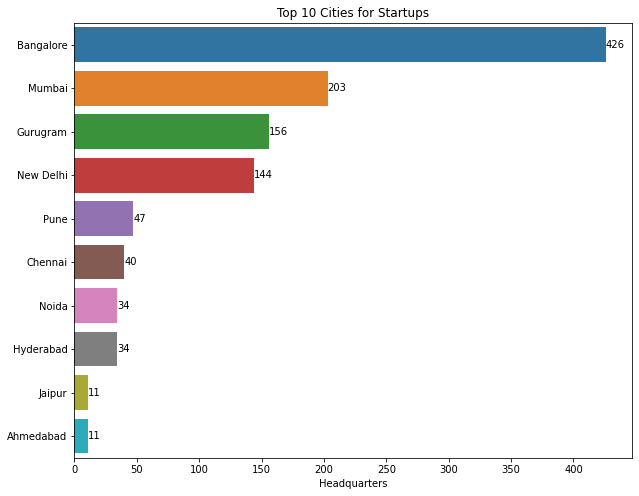

In [27]:
# Top 10 Cities for Startups
sector = df['Headquarters'].value_counts().sort_values(ascending = False)
a = sector.head(10)

plt.figure(figsize = (10,8))
ax = sns.barplot(x = a, y = a.index)
ax.bar_label(ax.containers[0])

plt.title('Top 10 Cities for Startups')
plt.show()

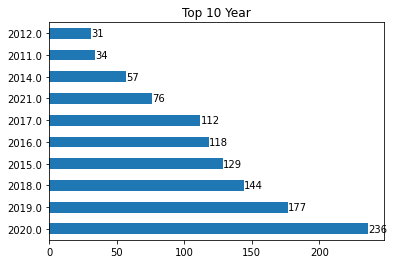

In [28]:
a = df['Founded'].value_counts().head(10).plot.barh()
a.bar_label(a.containers[0])
plt.title('Top 10 Year')
plt.show()

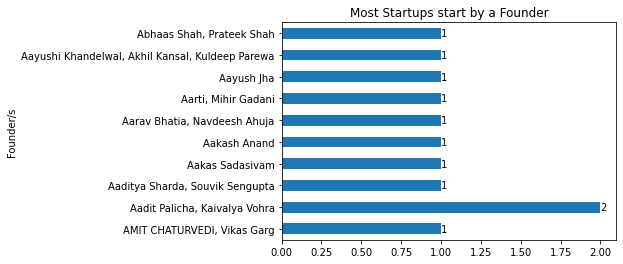

In [29]:
a = df.groupby(['Founder/s']).size()
b = a.head(10).plot.barh()
b.bar_label(b.containers[0])
plt.title('Most Startups start by a Founder')
plt.show()

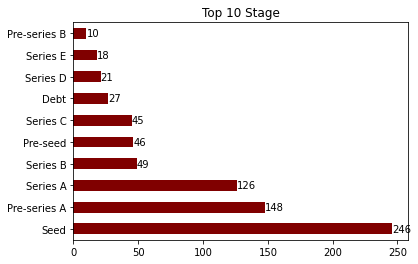

In [30]:
a = df['Stage'].value_counts().head(10).plot.barh(color='maroon')
a.bar_label(a.containers[0])
plt.title('Top 10 Stage')
plt.show()

* **Most Startups are done in Fintech and EdTech Sector**
* **Top city for startup is Bangalore**
* **Most startups are Founded in 2020**
* **In whole dataset only 2 person have started two startups which are "Aadit Palilcha and Kalvalya Vohra"**
* **Seed is top in stage in database**

**According to Google Bangalore is hub of technology and many IT companies are located in bangalore, so bangalore is top of the list in cities. Second people and youngster are motivated to start own business thisdays in 2020**

# Up Vote
**First, Thanks for visitig my notebook, Second if you like this notebook, Please UP VOTE. I will update this notebook regularly.**